In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

In [3]:
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 20)

In [4]:
X.shape, y.shape

((50, 2), (50,))

In [33]:
y

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0])

As `X` is 2-D array, it has x-coordinate=`X[:, 0]` and y-coordinate=`X[:, 1]`

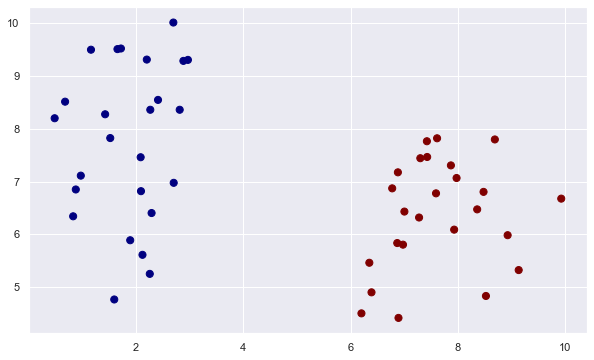

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="jet");

In [8]:
model = SVC(kernel = "linear", C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [17]:
# plt.figure(figsize=(10, 6))
# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="jet")
# plt.plot(X[:, 0], y);

### Now it's time for prediction or testing our model

In [9]:
# Let's create some data
test_data = np.array([[3, 6], [5, 6], [4, 7]])
test_result = np.array([0, 1, 0])
pred = model.predict(test_data)
pred

array([0, 1, 0])

In [11]:
score = model.score(test_data, test_result)
score

1.0

#### plt.gca()
gca = get the current axes

#### [np.meshgrid()](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy "stack overflow")

In [12]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    P = model.decision_function(xy).reshape(XX.shape)
    
    # plot decision boundary and margins
    ax.contour(XX, YY, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

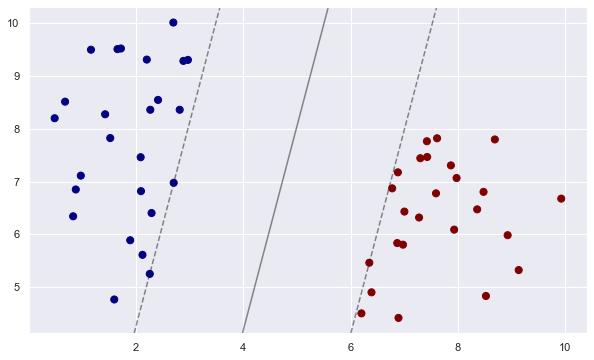

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plot_svc_decision_function(model);

In [14]:
model.support_vectors_

array([[2.25605326, 5.24990931],
       [2.70208537, 6.97579352],
       [6.34822954, 5.46058533]])

# Facial Recognition

## Prepocessing the dataset

In [49]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = 150, whiten=True, random_state=42)
svc = SVC(kernel = "rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                    random_state=42)

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
             'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
%time grid.fit(X_train, y_train)
print(grid.best_params_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 47.9 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [56]:
model = grid.best_estimator_
yfit = model.predict(X_test)

### Visualize test images

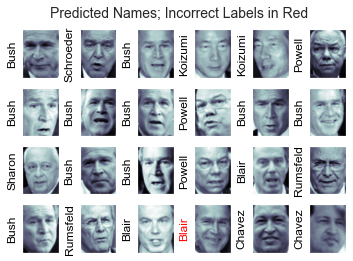

In [59]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap = "bone")
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color="black" if yfit[i] == y_test[i] else "red")
    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

### Evaluating SVC

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                           target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



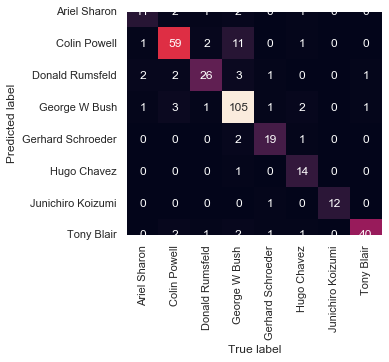

In [62]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False,
           xticklabels = faces.target_names,
           yticklabels = faces.target_names)

plt.xlabel("True label")
plt.ylabel("Predicted label");